In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64': 
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.vector_gen import *
# from Utils.w2b_encoding_lw_iter1 import *
from Utils.w2b_encoding_lw_iter2 import *
# from Utils.w2b_encoding_lw_iter3 import *
# from Utils.w2b_encoding_lw_iter4 import *
from Models.RNN_paper_prototype import *
from Utils.metrics_summary import *

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-20 18:09:21.116809: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-20 18:09:21.116837: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-20 18:09:21.116866: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-20 18:09:21.116919: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-20 18:09:21.116941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
original_df = dataframe_init(gpu_token)[0]
vectors = vec_split(original_df)
vectors = encoder2(vectors)
tensors = tensor_gen(vectors)

/Users/saksh.menon/Documents/GitHub/C-RNN-approach/Utils/w2b_encoding_lw_iter2.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/Users/saksh.menon/Documents/GitHub/C-RNN-approach/Utils/w2b_encoding_lw_iter2.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/Users/saksh.menon/Documents/GitHub/C-RNN-approach/Utils/w2b_encoding_lw_iter2.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [3]:
vectors[2].to_excel("vector2.xlsx")

In [3]:
model = model_ver_5(tensors[0][0].shape[0])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
for i in vectors[0].loc:
    if i['Lines'].lstrip('<start>').lstrip().startswith('if'):
        print(i)

: 

In [4]:
history = model.fit(tensors[0], tensors[3], epochs=50, validation_data=(tensors[1],tensors[4]))
y_pred = model.predict(tensors[2])

Epoch 1/50


2024-04-20 18:09:39.730280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - ETA: 0s - loss: 0.6353 - accuracy: 0.9453

2024-04-20 18:09:53.819062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 18s 153ms/step - loss: 0.6353 - accuracy: 0.9453 - val_loss: 0.5664 - val_accuracy: 0.9485
Epoch 2/50
90/90 [==============================] - 11s 120ms/step - loss: 0.5236 - accuracy: 0.9457 - val_loss: 0.4818 - val_accuracy: 0.9485
Epoch 3/50
90/90 [==============================] - 11s 120ms/step - loss: 0.4462 - accuracy: 0.9681 - val_loss: 0.4101 - val_accuracy: 0.9755
Epoch 4/50
90/90 [==============================] - 11s 120ms/step - loss: 0.3789 - accuracy: 0.9762 - val_loss: 0.3513 - val_accuracy: 0.9755
Epoch 5/50
90/90 [==============================] - 11s 120ms/step - loss: 0.3292 - accuracy: 0.9762 - val_loss: 0.3061 - val_accuracy: 0.9755
Epoch 6/50
90/90 [==============================] - 11s 119ms/step - loss: 0.2877 - accuracy: 0.9762 - val_loss: 0.2725 - val_accuracy: 0.9755
Epoch 7/50
90/90 [==============================] - 11s 120ms/step - loss: 0.2627 - accuracy: 0.9762 - val_loss: 0.2478 - val_accuracy: 0.9755
Epoch 8/50

2024-04-20 18:27:51.546274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 14ms/step


In [5]:
y_pred[:100]

array([[0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.985776  , 0.01422401],
       [0.

In [6]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[5]))

In [7]:
score_summary(classified_labels, classified_outputs, 0)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
print('#########################################\n')
score_summary(classified_labels, classified_outputs, 1)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))

For secure:
f1 score:  0.9875930521091811
precision score:  0.9754901960784313
recall score:  0

true_positives: 796
true_negetives: 0
false_positives: 20
false_negetives: 0

#########################################

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0

true_positives: 0
true_negetives: 796
false_positives: 0
false_negetives: 20



In [14]:
model.predict([[1,0,0, 1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]])

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


array([[0.99744   , 0.00256002]], dtype=float32)

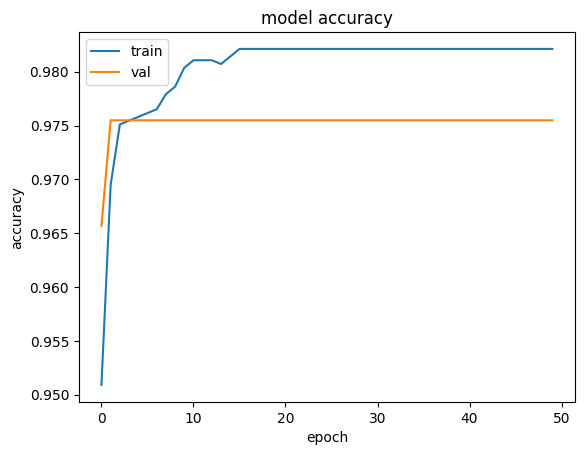

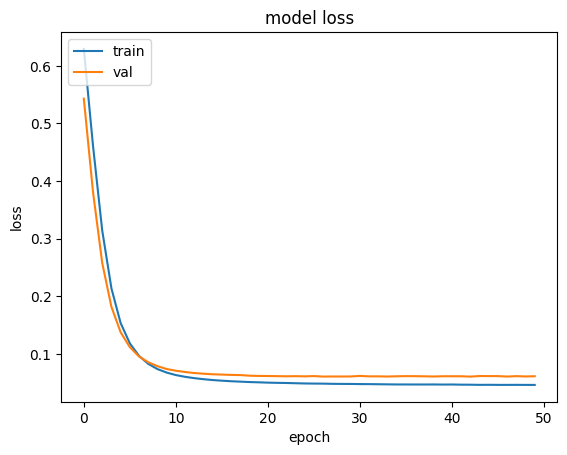

In [8]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [4]:
!nvidia-smi

Tue Apr 16 16:22:14 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 27%   34C    P8     5W / 151W |     16MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
!kill 6281

In [5]:
!git pull

remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15 (delta 11), reused 15 (delta 11), pack-reused 0
Unpacking objects: 100% (15/15), 60.92 KiB | 1.35 MiB/s, done.
From https://github.com/sakshmenon/Faulthunter-RNN-approach
   2381dca..02cc86a  dev        -> origin/dev
Updating 2381dca..02cc86a
Fast-forward
 Models/RNN_paper_prototype.py                      |    13 +-
 Scripts/tester.ipynb                               | 14509 ++++++++++++++++++-
 Utils/__pycache__/w2b_encoding_lw.cpython-310.pyc  |   Bin 2849 -> 2875 bytes
 .../w2b_encoding_lw_iter2.cpython-310.pyc          |   Bin 0 -> 2805 bytes
 .../w2b_encoding_lw_iter3.cpython-310.pyc          |   Bin 0 -> 2842 bytes
 Utils/w2b_encoding_lw_iter1.py                     |   105 +
 Utils/w2b_encoding_lw_iter2.py                     |   106 +
 Utils/w2b_encoding_lw_iter3.py                     |   107 +
 Utils/w2b_encoding_lw_iter4.py    